University of Helsinki, Master's Programme in Data Science  
DATA20019 Trustworthy Machine Learning, Autumn 2019  
Antti Honkela and Razane Tajeddine  

# Project 1: Local differential privacy for privacy-preserving data analysis

Deadline for returning the solutions: 11 November 23:55.

Python is recommended for solving the problems and it is supported by the course. If you wish, you can use R, but we cannot guarantee support for technical problems in R.

## General instructions (IMPORTANT!)

1. This is an individual project. You can discuss the solutions with other students, but everyone needs to write their own code and answers.
2. Please return your solutions as a notebook. When returning your solutions, please leave all output in the notebook.
3. When returning your solutions, please make sure the notebook can be run cleanly using "Cell" / "Run All".
4. Please make sure there are no dependencies between solutions to different problems.
5. Please make sure that your notebook will not depend on any local files.
6. Please make sure that the solutions for each problem in your notebook will produce the same results when run multiple times, i.e. remember to seed any random number generators you use (`numpy.random.seed()`!).



## Task 1: Do you use illegal drugs?

Let us consider the so-called "randomised response" mechanism for collecting responses to a potentially embarrassing or private question. In this mechanism, the respondents are instructed to as follows:

1. Flip a coin.
2. If **tails**, then respond truthfully.
3. If **heads**, then flip a second coin and respond *Yes* if heads and *No* if tails.

i. Calculate the probability of the randomised response being "yes" and the probability of the randomised response being "no", conditional to true response being "yes"/"no".

ii. Verify that this mechanism satisfies local $\epsilon$-DP with $\epsilon = \ln 3$.

iii. Assuming a population of independent respondents who have the probability $\pi$ to answer yes. Design a method to estimate $\pi$ from the noisy responses. Simulate the mechanism with $n$ participants for $n = 10, 100, 1000, 10000$ with $\pi = 0.01, 0.1$. How accurately can you estimate $\pi$ in the different cases?

**Answers** 

i. In this answer $r$ is the randomized response, while $t$ is the true response. We are asked to compute the following probabilities:
1. $P(r="yes"|t="yes")=\frac{1}{2} + \frac{1}{2}*\frac{1}{2} = \frac{3}{4} = P(r="no"|t="no")$;
2. $P(r="yes"|t="no")=0 + \frac{1}{2}*\frac{1}{2} = \frac{1}{4} = P(r="no"|t="yes")$.

ii. We are asked to verify the following statement:

$\frac{Pr(\mathcal{M}(\mathcal{D})=s)}{Pr(\mathcal{M}(\mathcal{D}')=s)}\leq e^\epsilon \implies \frac{Pr(\mathcal{M}(\mathcal{D})="yes")}{Pr(\mathcal{M}(\mathcal{D}')="yes")}\leq e^\epsilon \implies \frac{3/4}{1/4}\leq e^\epsilon \implies 3 \leq e^\epsilon \implies e^{ln3} \leq e^\epsilon \implies \epsilon = ln3$.

iii. The code for this question is available below. It is possible to observe from the results that with the increase of the probability of answering "yes" truthfully (increase of PI) increases the probability of answering "yes" with the randomized response (this is true for the majority of the values of n (100, 1000, 10000)). For example with PI=0.01 the probability of answering "yes" with the randomized response in the case of 100 users is 0.26, while with PI=0.1 the probability of answering "yes" with the randomized response becomes 0.3.


In [1]:
import random
import numpy
random.seed(1)
numpy.random.seed(1)
 
def mechanism(p, n):
  users = [] # list that contains the randomized responses
  users2 = [] # list that contains the true answers
  for i in range(0,n):
    true_answer = numpy.random.choice([0, 1], p=[1-p, p]) # compute true answer with the given PI probability
    users2.append(true_answer)
    # flip the first coin
    coin = random.randint(0, 1) # tail is 0 and head is 1
    if coin == 0:
      users.append(true_answer) # if tail the user answers truthfully
    else:
      # if head the user flips another coin
      coin = random.randint(0, 1)
      if coin == 1:
        users.append(1) # if head he answers yes
      else:
        users.append(0) # if tail he answers no
  # compute accuracy of the randomized response compared to the true answer
  ok = 0
  for i in range(0,n):
    if users[i] == 1:
      ok += 1
  return ok/n

print("Cases with 0.01 probability of answering yes truthfully (PI=0.01)")
print("n=10:",mechanism(0.01, 10),"is the probability of yes in the randomized response")
print("n=100:",mechanism(0.01, 100),"is the probability of yes in the randomized response")
print("n=1000:",mechanism(0.01, 1000),"is the probability of yes in the randomized response")
print("n=10000:",mechanism(0.01, 10000),"is the probability of yes in the randomized response")
print("Cases with 0.1 probability of answering yes truthfully (PI=0.1)")
print("n=10:",mechanism(0.1, 10),"is the probability of yes in the randomized response")
print("n=100:",mechanism(0.1, 100),"is the probability of yes in the randomized response")
print("n=1000:",mechanism(0.1, 1000),"is the probability of yes in the randomized response")
print("n=10000:",mechanism(0.1, 10000),"is the probability of yes in the randomized response")

Cases with 0.01 probability of answering yes truthfully (PI=0.01)
n=10: 0.3 is the probability of yes in the randomized response
n=100: 0.26 is the probability of yes in the randomized response
n=1000: 0.258 is the probability of yes in the randomized response
n=10000: 0.251 is the probability of yes in the randomized response
Cases with 0.1 probability of answering yes truthfully (PI=0.1)
n=10: 0.2 is the probability of yes in the randomized response
n=100: 0.3 is the probability of yes in the randomized response
n=1000: 0.315 is the probability of yes in the randomized response
n=10000: 0.3003 is the probability of yes in the randomized response


## Task 2: Generalising randomised response

Consider a generalised randomised response mechanism, where each person flips $k$ coins in step 1 and responds truthfully if either  
i. all of them display tails  
ii. any one of them displays tails.

Verify that both of these produce $\epsilon$-DP mechanisms for each $k$. Evaluate and plot $\epsilon$ as a function of $k$ for each case and $k = 1, \dots, 10$.

**Considerations**

Cases:

1. More is the number of coins that have to be flipped in the first step and more will be the privacy for the respondant. This because with the adding of coins that have to be flipped in the first step the probability of answering truthfully becomes smaller. For this reason it is possible to observe from the first graph that $\epsilon$ decreases with the increasing of the number of coins that have to be flipped in the first step, giving more privacy to the user. This means that in this case it is easier to guarantee differential privacy with the increasing of $k$.

2. More is the number of coins that have to be flipped in the first step and less will be the privacy for the respondant. This because with the adding of coins that have to be flipped in the first step the probability of answering truthfully becomes higher. For this reason it is possible to observe from the second graph that $\epsilon$ increases with the increasing of the number of coins that have to be flipped in the first step, giving less privacy to the user. This means that in this case it is harder to guarantee differential privacy with the increasing of $k$.

Case 1:
With k = 1 epsilon-DP is satisfied with epsilon = 1.0986122886681098
With k = 2 epsilon-DP is satisfied with epsilon = 0.5108256237659907
With k = 3 epsilon-DP is satisfied with epsilon = 0.25131442828090617
With k = 4 epsilon-DP is satisfied with epsilon = 0.125163142954006
With k = 5 epsilon-DP is satisfied with epsilon = 0.06252035698133393
With k = 6 epsilon-DP is satisfied with epsilon = 0.03125254350410453
With k = 7 epsilon-DP is satisfied with epsilon = 0.015625317903080815
With k = 8 epsilon-DP is satisfied with epsilon = 0.007812539736793625
With k = 9 epsilon-DP is satisfied with epsilon = 0.0039062549670652105
With k = 10 epsilon-DP is satisfied with epsilon = 0.00195312562088207
Case 2
With k = 1  epsilon-DP is satisfied with epsilon = 1.0986122886681098
With k = 2  epsilon-DP is satisfied with epsilon = 1.9459101490553132
With k = 3  epsilon-DP is satisfied with epsilon = 2.70805020110221
With k = 4  epsilon-DP is satisfied with epsilon = 3.4339872044851463
With k

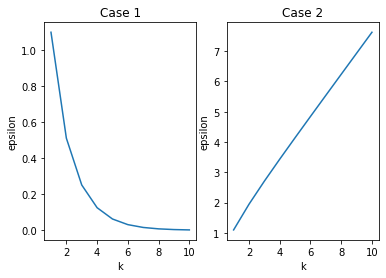

In [0]:
# Smaller values of the privacy parameter ε imply stronger guarantees under differential privacy.
import math
import matplotlib.pyplot as plt
 
# this function implements the first task
def taskOne():
  ks = [] # list containing the k values for the plot
  epsilons = [] # list containing epsilon values for the plot
  print("Case 1:")
  for k in range(1,11):
    ks.append(k)
    tot = math.pow(2,k)
   
    ry_ty = 1/tot + ((tot-1)/tot * (1/2)) # compute the probability P(r="yes"|t="yes")
    ry_tn = 1 - ry_ty # compute the probability P(r="yes"|t="no")
 
    epsilon = math.log(ry_ty/ry_tn) # compute epsilon
    print("With k =",k,"epsilon-DP is satisfied with epsilon =",epsilon) # epsilon DP verification
    epsilons.append(epsilon)
  plt.xlabel("k")
  plt.ylabel("epsilon")
  plt.title("Case 1")
  plt.plot(ks, epsilons)


# this function implements the second task
def taskTwo():
  print("Case 2")
  ks = [] # list containing the k values for the plot
  epsilons = [] # list containing epsilon values for the plot
 
  for k in range(1,11):
    ks.append(k)
    tot = math.pow(2,k)
   
    ry_ty = ((tot-1)/tot) + ((1/tot)*(1/2)) # compute the probability P(r="yes"|t="yes")
    ry_tn = 1 - ry_ty # compute the probability P(r="yes"|t="no")
 
    epsilon = math.log(ry_ty/ry_tn) # compute epsilon
    print("With k =",k," epsilon-DP is satisfied with epsilon =",epsilon) # epsilon DP verification
    epsilons.append(epsilon)
  plt.xlabel("k")
  plt.ylabel("epsilon")
  plt.title("Case 2")
  plt.plot(ks, epsilons)
 
plt.subplot(1, 2, 1) 
taskOne() 
plt.subplot(1, 2, 2)
taskTwo() 

## Task 3: How much money do you have on your bank account?

To answer a question about a scalar value, we need a different mechanism. Here we use the Laplace mechanism, which works as follows:

* Evaluate the *sensitivity* of the function $f$ of interest:
$$ \Delta f = \max\limits_{\mathcal{D} \sim \mathcal{D}'} | f(\mathcal{D}) - f(\mathcal{D}') |, $$
where $\mathcal{D} \sim \mathcal{D}'$ denotes pairs of data sets that differ by a single sample.
* Compute $\mathcal{M}(\mathcal{D}) = f(\mathcal{D}) + \frac{\Delta f}{\epsilon} \eta$
where $\eta \sim \operatorname{Laplace}(0, 1)$

In this exercise we apply the Laplace mechanism in locally differentially private mode, i.e. each individual is assumed to form a different single-observation data set that is protected using this mechanism.

In order to estimate the mean of the distribution of data held by the users, we can use the following moment identities with $x$ denoting the user data and $z$ denoting the Laplace noise added for DP:
$$ \mathrm{E}[x + z] = \mathrm{E}[x] + \mathrm{E}[z], $$
$$ \mathrm{Var}[x + z] = \mathrm{Var}[x] + \mathrm{Var}[z]. $$

i) What is the probability $Pr(\mathcal{M}(\mathcal{D})=s)$ for some outcome $s$? Also, find the ratio $\frac{Pr(\mathcal{M}(\mathcal{D})=s)}{Pr(\mathcal{M}(\mathcal{D}')=s)}$.

ii) (Optional) Verify that this mechanism satisfies $\epsilon$-DP.

iii) Assuming a population of independent respondents whose bank account balances follow the exponential distribution $\mathrm{Exp}(\lambda)$ with $\lambda = 1/5000$. Simulate the mechanism for $n$ participants with $n = 10, 100, 1000, 10000$. How accurately can you estimate the mean and the standard deviation of the bank account balance distribution?
Repeat each simulation 100 times to get an idea of the accuracy.

Hint: you will need to set an upper bound on the allowed balances to get a bounded sensitivity. Larger values can be handled e.g. by setting them to the maximum. In order to guarantee DP, this bound should be selected independently of the actual data at hand. (Mechanisms that do not require such an a priori bound exist, but are more complicated. If you are interested, see e.g. https://dl.acm.org/citation.cfm?id=1250803.)

**Answers**

i) $Pr(\mathcal{M}(\mathcal{D})=s) = Pr(f(\mathcal{D}) + \frac{\Delta f}{\epsilon} \eta = s) = Pr(\eta = (s - f(\mathcal{D}))*\frac{\epsilon}{\Delta f}) = \frac{1}{2}*e^{-|(s - f(\mathcal{D}))*\frac{\epsilon}{\Delta f})|}$.

$\frac{Pr(\mathcal{M}(\mathcal{D})=s)}{Pr(\mathcal{M}(\mathcal{D}')=s)} = \frac{\frac{1}{2}*e^{-|(s - f(\mathcal{D}))*\frac{\epsilon}{\Delta f})|}}{\frac{1}{2}*e^{-|(s - f(\mathcal{D'}))*\frac{\epsilon}{\Delta f})|}} = e^{|(s - f(\mathcal{D'}))*\frac{\epsilon}{\Delta f})| - |(s - f(\mathcal{D}))*\frac{\epsilon}{\Delta f})|} \leq e^{|f(\mathcal{D'}) - f(\mathcal{D})|*\frac{\epsilon}{\Delta f}} \leq e^{\epsilon}.$

ii) The answer to this question is included in the second answer of the previous question.

iii) It is possible to find the requested accuracies in the outputs of the code provided below. It is possible to observe that with the increase of the number of databases the difference between the true expected value (expected value of the balances without the adding of the noise) and the expected value on the noisy data (expected value of the balances with the adding of the noise) decreases. This means that with the increase of the number of databases the noise becomes less effective (original data are very similar to noisy data) and the privacy of the users is reduced, so it is more difficult to guarantee differential privacy.


In [0]:
import numpy
numpy.random.seed(1)

def simulation(n):
  balance_bound = 150000 # set the balance bound to bound the sensitivity
  print("Case with", n, "databases")
  accounts = numpy.random.exponential(5000, n) # create n different databases containing a single user balance
  # cut accounts that are greater than the balance bound
  for i in range(len(accounts)):
    if accounts[i] > balance_bound:
      accounts[i] = balance_bound
  # compute expected value and variance of the distribution without noise
  Ex = numpy.mean(accounts)
  Varx = numpy.var(accounts)

  # find the sensitivity
  max = -10000
  for i in range(0,n):
    for j in range(0,n):
      diff = abs(accounts[i] - accounts[j])
      if max < diff:
        max = diff
  sensitivity = max
  # setting epsilon
  epsilon = 1
  # setting variables to compute the mean of the distortion
  diff1 = 0
  diff2 = 0
  # we try to add random noise 100 times to get an idea of the accuracy
  for i in range(0,100):
    accounts_with_noise = []
    noises = numpy.random.laplace(0, 1, n) # generating n noises to be added to the n balances
    # adding noises to the n balances
    for i in range(0, n):
      accounts_with_noise.append(accounts[i] + noises[i]*(sensitivity/epsilon))
    # computing expected value and variance for the situation with noise (noisy data)
    Exz = numpy.mean(accounts) + numpy.mean(noises)
    Varxz = numpy.var(accounts) + numpy.var(noises)
    # computing distortion of the noisy expected value and variance from the situation without noise
    diffE = abs(Ex - Exz)
    diffVar = abs(Varx - Varxz)
    diff1 += diffE
    diff2 += diffVar

  # computing the mean of the distortion
  diff1 /= 100
  diff2 /= 100
  print("Mean distortion of the expected value from the true expected value:", diff1)
  print("Mean distortion of the variance from the true variance:", diff2)


simulation(10)
simulation(100)
simulation(1000)
simulation(10000)

Case with 10 databases
Mean distortion of the expected value from the true expected value: 0.33066382942137806
Mean distortion of the variance from the true variance: 1.8054701474122703
Case with 100 databases
Mean distortion of the expected value from the true expected value: 0.12134142842972323
Mean distortion of the variance from the true variance: 1.937329389154911
Case with 1000 databases
Mean distortion of the expected value from the true expected value: 0.03323510290499144
Mean distortion of the variance from the true variance: 2.0119748592376707
Case with 10000 databases
Mean distortion of the expected value from the true expected value: 0.011446935855419725
Mean distortion of the variance from the true variance: 1.9925934951752424


## Task 4: Does your age affect your account balance?

We can apply the Laplace mechanism to fit a linear regression model to model the bank account balance as a function of age. We know that the respondents are of age 20-70 years and their account balances are at most 150000.

Linear regression fit to scalar $x_i, y_i$ involves fitting the model
$$ y_i = \alpha + \beta x_i + \epsilon_i, $$
where $\beta$ is the regression coefficient and $\alpha$ is the intercept. Assuming regression errors $\epsilon_i$ are normally distributed, the maximum likelihood estimates of the parameters are
$$ \hat{\beta}= \frac{\sum_{i = 1}^n (x_i - \bar{x})(y_i - \bar{y}) }{ \sum_{i = 1}^n (x_i - \bar{x})^2} \\
   \hat{\alpha} = \bar{y} - \hat{\beta} \bar{x},$$
where $\bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i$ and $\bar{y} = \frac{1}{n} \sum_{i = 1}^n y_i$.

i. Use the data in "balances.csv" loaded below, and release $x$ (the age) and $y$ (the bank account balance) using Laplace mechanism with total privacy loss $\epsilon=1$ and fit the regression model to the noisy data. Repeat the process 100 times and evaluate how the model compares with one learned from clean data. Because you are releasing the composition of two queries, you will need to use $\epsilon/2$ as the $\epsilon$ for each query to reach total privacy loss of $\epsilon$.

ii. Design a two-step protocol that first estimates the means $\bar{x}$ and $\bar{y}$, and then uses these to release the terms $(x_i - \bar{x}) (y_i - \bar{y})$, $(x_i - \bar{x})^2$ using the Laplace mechanism. Fit the regression model using the noisy information. Compare with the above. In order to make the results comparable, the total privacy loss should be $\epsilon=1$. Because you are releasing the composition of four queries, you will need to use $\epsilon/4$ as the $\epsilon$ for each query to reach total privacy loss of $\epsilon$.

iii. Repeat the above cases with total privacy loss $\epsilon = 10$ and compare the results.

Hint: you can use the known range of values of $x$ and $y$ to bound the sensitivites. For the two-step protocol, you can also use the published private means $\bar{x}$ and $\bar{y}$ to evaluate the sensitivity for the second step, as long as you do not use any other features of the specific data set.

Comment: a better solution would take into account the knowledge of the noise added. Developing algorithms like this is in many cases still an open research problem. Furthermore, the privacy budget can be split between different queries arbitrarily, not necessarily evenly like here.

**Considerations**

The code for the tasks is available in the two following cells. These are my considerations on the results obtained:

i) It is possible to observe from the results that the model fitted on noisy data (model fitted on x and y after the introduction of noise) is highly distorted from the model fitted on the original data (data without the adding of noise) giving privacy to the users in the dataset. In fact, it is possible to observe that the difference between the two computed MSE (MSE of the model trained on original data and MSE of the model trained on noisy data) is really big (the MSE of these two models have been computed on the original data to make a good comparision). After that it is possible to observe that with the increase of the value of the $\epsilon$ parameter the difference between the two MSE becomes smaller. This is due to the fact that increasing the value of $\epsilon$ we decrease the privacy of the users in the dataset because we introduce less noise on the data allowing the model fitted on the noisy data to become similar to the model fitted on the original data. Finally, it is possible to observe this behavior from the graphs I've displayed. On the left one it is possible to see that due to the small $\epsilon$ value the lines computed by the two models (true and noisy model) are really different, while in the right one it is possible to see that the lines are closer and this is due to the higher $\epsilon$ value.

ii) For this question the answer is similar to the previous one. It is possible to observe that with $\epsilon=1$ the difference between the MSE of the model fitted in the original data and the MSE of the model fitted on noisy data is really high. Then, it is possible to observe that with the increase of the value of $\epsilon$ we reduce the privacy for the users in the dataset, like in the previous answer, but since we are adding noise in two step (more noise compared to the previous answer) with $\epsilon=10$ we don't loose a huge amount of privacy like in the previous case (from the second graph it is possible to see that with $\epsilon=10$ the model fitted on noisy data is still very different from the model fitted on the original data). The biggest difference between the two answers is that since we add noise in two steps, with the same value of $\epsilon$ we obtain a stronger privacy guarantee in this case. It is possible to compare the graphs of the previous answer with the graphs of this answer to see that with the same value of $\epsilon$ the difference between the MSEs is higher in this case and this means that we loose less privacy even if we are using the same value of $\epsilon$. This is due to the fact that we add more noise compared to the previous case.

iii) The answer to this question has been given in the previous answers.

epsilon=1
MSE of model fitted on noisy data: 136878134592.80902
MSE of model fitted on real data: 317504486.01051825
Difference between MSEs: 136560630106.79851
epsilon=10
MSE of model fitted on noisy data: 1741192338.4044943
MSE of model fitted on real data: 317504486.01051825
Difference between MSEs: 1423687852.393976


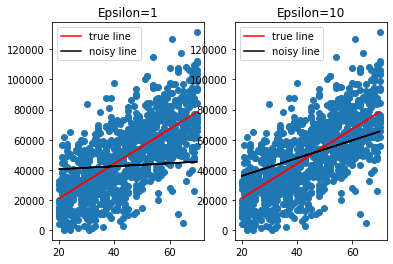

In [0]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import math

np.random.seed(1)
global temp # variable used to display only one of the 100 models tried
temp = 0

data = pd.read_csv('https://www.cs.helsinki.fi/u/ahonkela/teaching/tml/balances.csv', header=0, index_col=0)

# this function perform the linear regression on given data
def regr(ax, x, y, c, l, x_alt, mode):
  global temp
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  sum_num = 0
  sum_den = 0
  for i in range(N):
    sum_num += (x[i] - x_mean)*(y[i] - y_mean)
    sum_den += (x[i] - x_mean)*(x[i] - x_mean)

  beta = sum_num/sum_den
  alpha = y_mean - beta*x_mean
  if mode == 2:
    if(temp == 0):
      ax.plot(x_alt, alpha + beta*x_alt, color=c, label=l)
      temp = 1
    y_pred = alpha + beta*x_alt
  else:
    ax.plot(x, alpha + beta*x, color=c, label=l)
    y_pred = alpha + beta*x
  # computing the MSE of the fitted model on the data
  mse = 0
  for i in range(N):
    mse += math.pow(y[i] - y_pred[i], 2)
  mse/=N
  return mse

# this function performs the simulation of regressing 100 linear models on 100 different datasets (they differ on the amount of noise added)
# and computes the mean MSE of these models against the real dataset (dataset without noise)
def simulation(ax, x, y, n, epsilon):
  # make 100 simulation
  mean_noisy_mse = 0
  for h in range(0,100):
    # balances sensitivity computation
    max = -10000
    for i in range(0,n):
      for j in range(0,n):
        diff = abs(y[i] - y[j])
        if max < diff:
          max = diff
    sensitivity_balances = max
    # ages sensitivity computation
    max = -10000
    for i in range(0,n):
      for j in range(0,n):
        diff = abs(x[i] - x[j])
        if max < diff:
          max = diff
    sensitivity_ages = max
    # adding noise to balances and ages
    accounts_with_noise = []
    noises_for_balances = np.random.laplace(0, 1, n)
    ages_with_noise = []
    noises_for_ages = np.random.laplace(0, 1, n)
    for i in range(0, n):
      accounts_with_noise.append(y[i] + noises_for_balances[i]*(sensitivity_balances/epsilon))
      ages_with_noise.append(x[i] + noises_for_ages[i]*(sensitivity_ages/epsilon))
    
    mean_noisy_mse += regr(ax, ages_with_noise, accounts_with_noise, 'black', "noisy line", x, 2)

  # compute the mean of all the different 100 MSE found for the 100 noisy models tried
  mean_noisy_mse /= 100
  return mean_noisy_mse

x = data.values[:,0]
y = data.values[:,1]
N = len(data)

fig = plt.figure()
ax = plt.subplot(121)
ax1 = plt.subplot(122)
ax.scatter(x, y)
true_mse = regr(ax, x, y, 'r', "true line", x, 1)
noisy_mse = simulation(ax, x, y, N, 0.5)
print("epsilon=1")
print("MSE of model fitted on noisy data:", noisy_mse)
print("MSE of model fitted on real data:", true_mse)
print("Difference between MSEs:", noisy_mse - true_mse)
ax.set_title("Epsilon=1")
ax.legend()
temp = 0
ax1.scatter(x, y)
true_mse = regr(ax1, x, y, 'r', "true line", x, 1)
noisy_mse = simulation(ax1, x, y, N, 5)
print("epsilon=10")
print("MSE of model fitted on noisy data:", noisy_mse)
print("MSE of model fitted on real data:", true_mse)
print("Difference between MSEs:", noisy_mse - true_mse)
ax1.set_title("Epsilon=10")
ax1.legend()
plt.show()

epsilon=1
MSE of model fitted on noisy data: 30299032617.58788
MSE of model fitted on real data: 317504486.01051825
Difference between MSEs: 29981528131.577362
epsilon=10
MSE of model fitted on noisy data: 7687383614.603376
MSE of model fitted on real data: 317504486.01051825
Difference between MSEs: 7369879128.592858


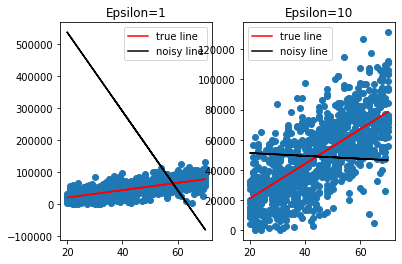

In [0]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import math

np.random.seed(1)
global temp # variable used to display only one of the 100 models tried
temp = 0

data = pd.read_csv('https://www.cs.helsinki.fi/u/ahonkela/teaching/tml/balances.csv', header=0, index_col=0)

# this function perform the linear regression on given data
def regr(ax, x, y, c, l, x_alt, mode):
  global temp
  x_mean = np.mean(x)
  y_mean = np.mean(y)
  sum_num = 0
  sum_den = 0
  for i in range(N):
    sum_num += (x[i] - x_mean)*(y[i] - y_mean)
    sum_den += (x[i] - x_mean)*(x[i] - x_mean)

  beta = sum_num/sum_den
  alpha = y_mean - beta*x_mean
  if mode == 2:
    if(temp == 0):
      ax.plot(x_alt, alpha + beta*x_alt, color=c, label=l)
      temp = 1
    y_pred = alpha + beta*x_alt
  else:
    ax.plot(x, alpha + beta*x, color=c, label=l)
    y_pred = alpha + beta*x
  # computing the MSE of the fitted model on the data
  mse = 0
  for i in range(N):
    mse += math.pow(y[i] - y_pred[i], 2)
  mse/=N
  return mse


def regr_noise(ax, num_terms, den_terms, x_mean, y_mean, c, l, x_alt, y_target):
  global temp
  sum_num = 0
  sum_den = 0
  for i in range(N):
    sum_num += num_terms[i]
    sum_den += den_terms[i]

  beta = sum_num/sum_den
  alpha = y_mean - beta*x_mean
  if(temp == 0):
    ax.plot(x_alt, alpha + beta*x_alt, color=c, label=l)
    temp = 1
  y_pred = alpha + beta*x_alt
  # computing the MSE of the fitted model on the data
  mse = 0
  for i in range(N):
    mse += math.pow(y_target[i] - y_pred[i], 2)
  mse/=N
  return mse

# this function performs the simulation of regressing 100 linear models on 100 different datasets (they differ on the amount of noise added)
# and computes the mean MSE of these models against the real dataset (dataset without noise)
def simulation(ax, x, y, n, epsilon):
  # make 100 simulation
  mean_noisy_mse = 0
  for h in range(0,100):
    # balances sensitivity computation
    max = -10000
    for i in range(0,n):
      for j in range(0,n):
        diff = abs(y[i] - y[j])
        if max < diff:
          max = diff
    sensitivity_balances = max
    # ages sensitivity computation
    max = -10000
    for i in range(0,n):
      for j in range(0,n):
        diff = abs(x[i] - x[j])
        if max < diff:
          max = diff
    sensitivity_ages = max
    # adding noise to balances and ages (adding noise in the first step of the protocol)
    accounts_with_noise = []
    noises_for_balances = np.random.laplace(0, 1, n)
    ages_with_noise = []
    noises_for_ages = np.random.laplace(0, 1, n)
    for i in range(0, n):
      accounts_with_noise.append(y[i] + noises_for_balances[i]*(sensitivity_balances/epsilon))
      ages_with_noise.append(x[i] + noises_for_ages[i]*(sensitivity_ages/epsilon))
    # computing the terms for the regression computation
    x_mean = np.mean(ages_with_noise)
    y_mean = np.mean(accounts_with_noise)
    num_terms = []
    den_terms = []
    for i in range(N):
      num_terms.append((ages_with_noise[i] - x_mean)*(accounts_with_noise[i] - y_mean))
      den_terms.append((ages_with_noise[i] - x_mean)*(ages_with_noise[i] - x_mean))
    # adding noise to the regression terms (adding noise in the second step of the protocol)
    # numerator sensitivity computation
    max = -10000
    for i in range(0,n):
      for j in range(0,n):
        diff = abs(num_terms[i] - num_terms[j])
        if max < diff:
          max = diff
    sensitivity_num_terms = max
    # denominator sensitivity computation
    max = -10000
    for i in range(0,n):
      for j in range(0,n):
        diff = abs(den_terms[i] - den_terms[j])
        if max < diff:
          max = diff
    sensitivity_den_terms = max
    # adding noise to numerator and denominator terms
    num_terms_with_noise = []
    den_terms_with_noise = []
    noises_for_num_terms = np.random.laplace(0, 1, n)
    noises_for_den_terms = np.random.laplace(0, 1, n)
    for i in range(0, n):
      num_terms_with_noise.append(num_terms[i] + noises_for_num_terms[i]*(sensitivity_num_terms/epsilon))
      den_terms_with_noise.append(den_terms[i] + noises_for_den_terms[i]*(sensitivity_den_terms/epsilon))

    mean_noisy_mse += regr_noise(ax, num_terms_with_noise, den_terms_with_noise, x_mean, y_mean, 'black', "noisy line", x, y)

  # compute the mean of all the different 100 MSE found for the 100 noisy models tried
  mean_noisy_mse /= 100
  return mean_noisy_mse

x = data.values[:,0]
y = data.values[:,1]
N = len(data)

fig = plt.figure()
ax = plt.subplot(121)
ax1 = plt.subplot(122)
ax.scatter(x, y)
true_mse = regr(ax, x, y, 'r', "true line", x, 1)
noisy_mse = simulation(ax, x, y, N, 0.25)
print("epsilon=1")
print("MSE of model fitted on noisy data:", noisy_mse)
print("MSE of model fitted on real data:", true_mse)
print("Difference between MSEs:", noisy_mse - true_mse)
ax.set_title("Epsilon=1")
ax.legend()
temp = 0
ax1.scatter(x, y)
true_mse = regr(ax1, x, y, 'r', "true line", x, 1)
noisy_mse = simulation(ax1, x, y, N, 2.5)
print("epsilon=10")
print("MSE of model fitted on noisy data:", noisy_mse)
print("MSE of model fitted on real data:", true_mse)
print("Difference between MSEs:", noisy_mse - true_mse)
ax1.set_title("Epsilon=10")
ax1.legend()
plt.show()